In [205]:
from wfield import *
import os 
import h5py
import pandas as pd
from scipy.io import loadmat
from scipy.signal import savgol_filter

In [206]:
import seaborn as sns; sns.set_theme()
import numpy as np; np.random.seed(0)
import scipy.stats
from sklearn.metrics import pairwise_distances

In [267]:
directory = "D:/Behavior/Animals/"
animal = "FV-4/"
maze = "CD/"
session = "14-Jul-2022/"
file = "{}/"
sync = "sync"
path_sync = os.path.join(directory, animal, maze, session, sync)
os.chdir(path_sync)
print(path_sync)

D:/Behavior/Animals/FV-4/CD/14-Jul-2022/sync


In [268]:
lmarks = load_allen_landmarks('dorsal_cortex_landmarks.json')
ccf_regions_reference,proj,brain_outline = allen_load_reference('dorsal_cortex')
# the reference is in allen CCF space and needs to be converted
# this converts to warped image space (accounting for the transformation)
ccf_regions = allen_transform_regions(None,ccf_regions_reference,
                                      resolution = lmarks['resolution'],
                                        bregma_offset = lmarks['bregma_offset'])
atlas, areanames, brain_mask = atlas_from_landmarks_file('dorsal_cortex_landmarks.json') # this loads the atlas in transformed coords

# this converts the reference to image space (unwarped)
atlas_im, areanames, brain_mask = atlas_from_landmarks_file('dorsal_cortex_landmarks.json',do_transform = True) # this loads the untransformed atlas
ccf_regions_im = allen_transform_regions(lmarks['transform'],ccf_regions_reference,
                                        resolution = lmarks['resolution'],
                                        bregma_offset = lmarks['bregma_offset'])

In [269]:
act_corr = np.load('corr_avg_act.npy', allow_pickle=True)
act_incorr = np.load('incorr_avg_act.npy', allow_pickle=True)

In [270]:
#heatmap of activity over timecourse 

def heatmap_timecourse(act):
    finalArray = np.asarray(act, dtype = np.float64, order ='C')

    act = np.array(finalArray)
    data_start = 0
    data_end = 120
    act_slice = act[:, data_start:data_end]
    corr = np.corrcoef(act_slice) #pearson correlation coef 

    fig = plt.figure(figsize = [9,7])
    ax = sns.heatmap(act[:, data_start:data_end], vmin= -.25, vmax=.25,
                     yticklabels=ccf_regions_im['acronym'], xticklabels=30, center=0)
    ax.set_xlabel('frames', fontdict={'fontsize':18})
    ax.set_ylabel('ROI', fontdict={'fontsize':18})

In [271]:
def distance_matrix_ROI(act):
    finalArray = np.asarray(act, dtype = np.float64, order ='C')

    a = finalArray.mean(axis=1)
    b = finalArray.mean(axis=1)
    distances = pairwise_distances(X=a.reshape(-1, 1), Y=b.reshape(-1, 1))

    fig = plt.figure(figsize = [9,7])
    ax = sns.heatmap(distances, xticklabels=ccf_regions_im['acronym'], yticklabels=ccf_regions_im['acronym'],  center=0)
    ax.set_xlabel('ROI', fontdict={'fontsize':18})
    ax.set_ylabel('ROI', fontdict={'fontsize':18})

In [272]:
def corr_matrix_ROI(act):
    finalArray = act.tolist()
    corr = np.corrcoef(finalArray)
    fig = plt.figure(figsize = [9,7])
    ax = sns.heatmap(corr, vmin= -1, vmax=1,
                     xticklabels=ccf_regions_im['acronym'], yticklabels=ccf_regions_im['acronym'],  center=0)
    ax.set_xlabel('ROI', fontdict={'fontsize':18})
    ax.set_ylabel('ROI', fontdict={'fontsize':18})

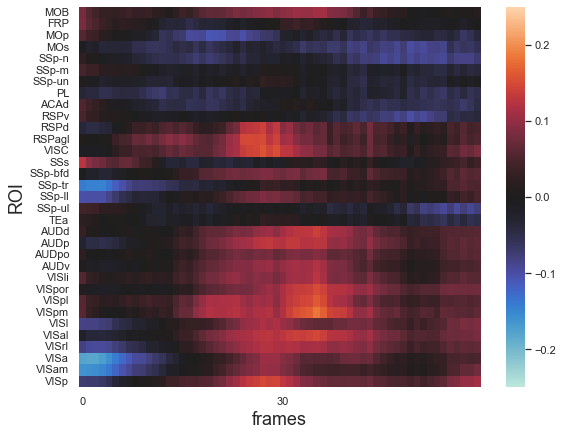

In [273]:
heatmap_timecourse(act_corr)

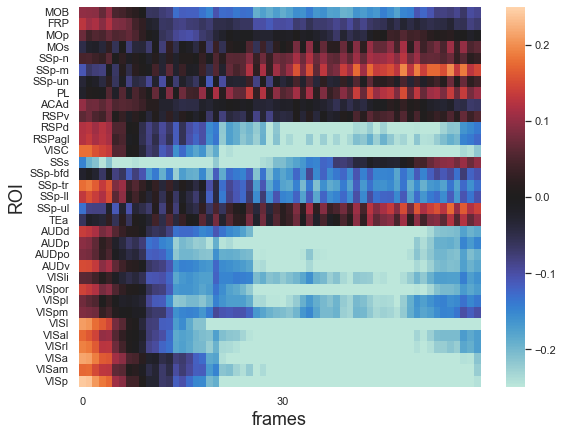

In [274]:
heatmap_timecourse(act_incorr)

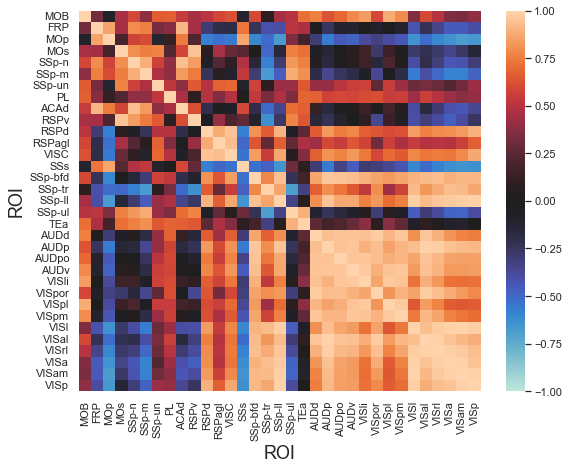

In [275]:
corr_matrix_ROI(act_corr)

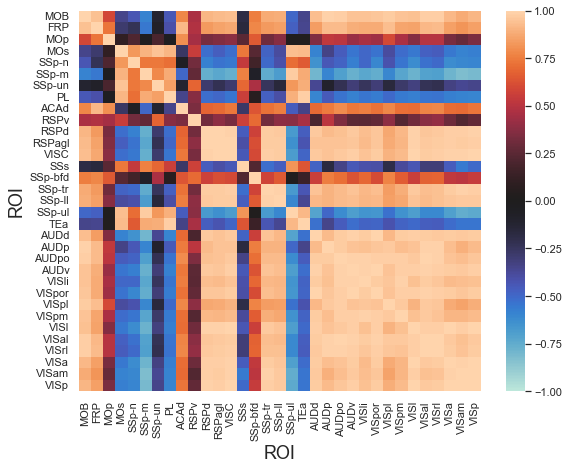

In [276]:
corr_matrix_ROI(act_incorr)

In [277]:
act = act_corr
finalArray = act.tolist()
corr_correct = np.corrcoef(finalArray)
np.save('corr_correct_CD', corr_correct)

In [278]:
act = act_incorr
finalArray = act.tolist()
corr_incorrect = np.corrcoef(finalArray)
np.save('corr_incorrect_CD', corr_incorrect)

In [283]:
directory = "D:/Behavior/Animals/"
animal = "FV-4/"
maze = "SD_CD_analysis"
path_sync = os.path.join(directory, animal, maze)
os.chdir(path_sync)
print(path_sync)

D:/Behavior/Animals/FV-4/SD_CD_analysis


In [284]:
corr_correct_CD = np.load('corr_correct_CD.npy')
corr_correct_SD = np.load('corr_correct_SD.npy')

In [285]:
corr_incorrect_CD = np.load('corr_incorrect_CD.npy')
c = np.load('corr_incorrect_SD.npy')

Text(57.453125, 0.5, 'ROI')

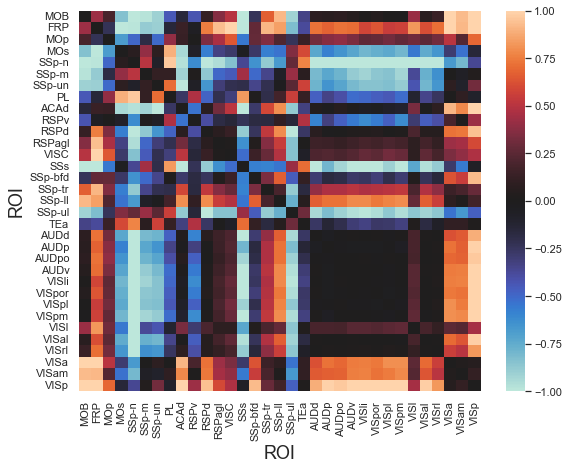

In [286]:
diff = corr_incorrect_CD - corr_incorrect_SD
fig = plt.figure(figsize = [9,7])
ax = sns.heatmap(diff, vmin= -1, vmax=1,
                 xticklabels=ccf_regions_im['acronym'], yticklabels=ccf_regions_im['acronym'],  center=0)
ax.set_xlabel('ROI', fontdict={'fontsize':18})
ax.set_ylabel('ROI', fontdict={'fontsize':18})